<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/TOVIMA_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [46]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [47]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [48]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [49]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [50]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [51]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 77.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [52]:
import spacy

In [53]:
nlp = spacy.load('el_core_news_sm')

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_ToVima_Airbnb.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [56]:
airbnb_df

article_url  \
0   https://www.tovima.gr/2025/06/21/finance/airbn...   
1   https://www.tovima.gr/2025/06/20/finance/airbn...   
2   https://www.tovima.gr/2025/05/29/finance/stega...   
3   https://www.tovima.gr/2025/05/22/finance/airbn...   
4   https://www.tovima.gr/2025/05/19/finance/airbn...   
..                                                ...   
84  https://www.tovima.gr/2022/10/27/finance/airbn...   
85  https://www.tovima.gr/2022/08/31/finance/greek...   
86  https://www.tovima.gr/2022/08/30/finance/gemat...   
87  https://www.tovima.gr/2022/08/18/finance/airbn...   
88  https://www.tovima.gr/2022/07/06/politics/i-st...   

                                                title        date   time  \
0   Airbnb: Οι νέοι κανόνες δεν πτοούν τη βραχυχρό...  21-06-2025  09:54   
1   Airbnb: Ανοδος μετά τη «βουτιά» του Πάσχα. Οι ...  20-06-2025  12:29   
2   Στεγαστική κρίση: Ξένες επενδύσεις, Airbnb μεί...  29-05-2025  10:07   
3   Airbnb: Οι φοροέλεγχοι της ΑΑΔΕ και «τσουχτερά...  22-05-2025  08:04   
4   Airbnb: Αύξηση κρατήσεων ενόψει καλοκαιριού – ...  19-05-2025  09:05   
..                                                ...         ...    ...   
84  Airbnb: Ποιες περιοχές της Αθήνας προτιμούν κα...  27-10-2022  23:43   
85  Greek Tourism: Airbnbs are full until the end ...  31-08-2022  09:50   
86             Γεμάτα τα Airbnb μέχρι τέλος Οκτωβρίου  30-08-2022  06:35   
87            Airbnb: Εισάγει τεχνολογία «αντι-πάρτι»  18-08-2022  21:54   
88  Η στεγαστική πολιτική ΣΥΡΙΖΑ ΠΣ – Τι προβλέπει...  06-07-2022  09:30   

      section               author  \
0   Οικονομία             Newsroom   
1   Οικονομία     Ανδρομάχη Παύλου   
2   Οικονομία             Newsroom   
3   Οικονομία       Μαρία Βουργάνα   
4   Οικονομία  Λάμπρος Καραγεώργος   
..        ...                  ...   
84  Οικονομία             Newsroom   
85  Οικονομία             Newsroom   
86  Οικονομία      Δήμητρα Σκούφου   
87  Οικονομία             Newsroom   
88   Πολιτική         Αρης Ραβανός   

                                               excert  \
0   Σε τροχιά ανόδου και μετασχηματισμού βρίσκεται...   
1   Οι τάσεις κρατήσεων για το καλοκαίρι παραμένου...   
2   Παρότι η επιβάρυνση από το κόστος στέγασης δεν...   
3   Τα αδήλωτα ακίνητα Airbnb ψάχνει η ΑΑΔΕ, ενώ σ...   
4   Τι δείχνουν οι κρατήσεις για τους καλοκαιρινού...   
..                                                ...   
84  Οι τρεις κορυφαίες περιοχές της Αθήνας, που φι...   
85  From 80% to 97% advance bookings in popular to...   
86  Από 80%  έως και 97% κινούνται οι προκρατήσεις...   
87  Εφάρμοσε παραλλαγή αυτού του συστήματος στην Α...   
88  Ο πρόεδρος του ΣΥΡΙΖΑ-ΠΣ παρουσίασε ένα σχέδιο...   

                                            text_body  \
0   Με εντυπωσιακούς ρυθμούς αναπτύσσονται καταλύμ...   
1   Περαιτέρω άνοδο με ισχυρή τη ζήτηση για το καλ...   
2   Την τελευταία δεκαετία η στέγη έχει γίνει απλη...   
3   Αδήλωτα εισοδήματα από βραχυχρόνιες μισθώσεις ...   
4   Ισχυρή ζήτηση δείχνουν οι βραχυχρόνιες μισθώσε...   
..                                                ...   
84  Υψηλότατη βαθμολογία 4,73/5 συγκεντρώνουν συνο...   
85  Tourist accommodations will continue to record...   
86  Με υψηλές πληρότητες μέχρι τα τέλη Οκτωβρίου θ...   
87  Η Airbnb επιστρατεύει την τεχνολογία για να κα...   
88  Το προγραμματικό πλαίσιο του ΣΥΡΙΖΑ-Προοδευτικ...   

                                        feat_img_link  \
0   https://www.tovima.gr/wp-content/uploads/2025/...   
1   https://www.tovima.gr/wp-content/uploads/2025/...   
2   https://www.tovima.gr/wp-content/uploads/2025/...   
3   https://www.tovima.gr/wp-content/uploads/2023/...   
4   https://www.tovima.gr/wp-content/uploads/2025/...   
..                                                ...   
84  https://www.tovima.gr/wp-content/uploads/2022/...   
85  https://www.tovima.gr/wp-content/uploads/2022/...   
86  https://www.tovima.gr/wp-content/uploads/2022/...   
87  https://www.tovima.gr/wp-content/uploads/20

In [57]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(71, 10)

In [58]:
len(airbnb_df)

71

In [59]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [60]:
short_airbnb_df.tail()

date                                               text
66  27-10-2022  Υψηλότατη βαθμολογία 4,73/5 συγκεντρώνουν συνο...
67  31-08-2022  Tourist accommodations will continue to record...
68  30-08-2022  Με υψηλές πληρότητες μέχρι τα τέλη Οκτωβρίου θ...
69  18-08-2022  Η Airbnb επιστρατεύει την τεχνολογία για να κα...
70  06-07-2022  Το προγραμματικό πλαίσιο του ΣΥΡΙΖΑ-Προοδευτικ...

In [61]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [62]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [63]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [64]:
wordcount_df.shape

(71, 13161)

In [65]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [66]:
wordcount_df[trust_words].sum(axis=1).head(3)

0    5
1    6
2    5
dtype: int64

In [67]:
short_airbnb_df.head(3)

date                                               text
0  21-06-2025  Με εντυπωσιακούς ρυθμούς αναπτύσσονται καταλύμ...
1  20-06-2025  Περαιτέρω άνοδο με ισχυρή τη ζήτηση για το καλ...
2  29-05-2025  Την τελευταία δεκαετία η στέγη έχει γίνει απλη...

In [68]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [69]:
short_airbnb_df

date                                               text  anger  \
0   21-06-2025  Με εντυπωσιακούς ρυθμούς αναπτύσσονται καταλύμ...      3   
1   20-06-2025  Περαιτέρω άνοδο με ισχυρή τη ζήτηση για το καλ...      3   
2   29-05-2025  Την τελευταία δεκαετία η στέγη έχει γίνει απλη...      3   
3   22-05-2025  Αδήλωτα εισοδήματα από βραχυχρόνιες μισθώσεις ...      4   
4   19-05-2025  Ισχυρή ζήτηση δείχνουν οι βραχυχρόνιες μισθώσε...      4   
..         ...                                                ...    ...   
66  27-10-2022  Υψηλότατη βαθμολογία 4,73/5 συγκεντρώνουν συνο...      1   
67  31-08-2022  Tourist accommodations will continue to record...      0   
68  30-08-2022  Με υψηλές πληρότητες μέχρι τα τέλη Οκτωβρίου θ...      2   
69  18-08-2022  Η Airbnb επιστρατεύει την τεχνολογία για να κα...      1   
70  06-07-2022  Το προγραμματικό πλαίσιο του ΣΥΡΙΖΑ-Προοδευτικ...     10   

    positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         13    1        1         1      5             3        2         7   
1          6    1        1         0      6             1        1         5   
2         13    4        2         3      5             5        4         8   
3          7    1        3         2      4             2        3         9   
4          9    1        0         0      9             1        1         4   
..       ...  ...      ...       ...    ...           ...      ...       ...   
66         7    2        1         2     10             5        1         3   
67         0    0        0         0      0             0        0         0   
68        11    2        1         2      4             4        1         4   
69        12    2        1         0      6             3        0         3   
70        37   11        9         3     22            22        9        32   

    fear  
0      2  
1      0  
2      6  
3      5  
4      1  
..   ...  
66     1  
67     0  
68     1  
69     0  
70    10  

[71 rows x 12 columns]

In [70]:
len(short_airbnb_df)

71

In [71]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-71-4281083099.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime


/tmp/ipython-input-72-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

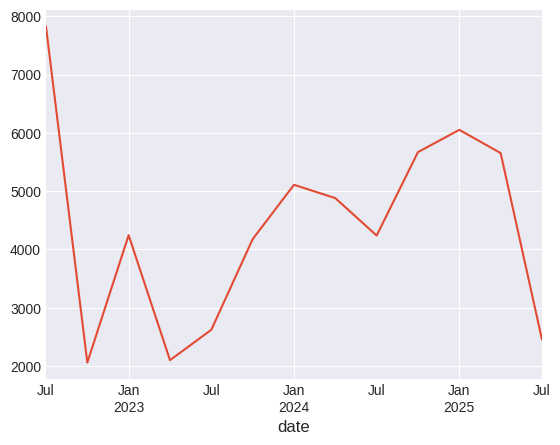

In [72]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-73-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

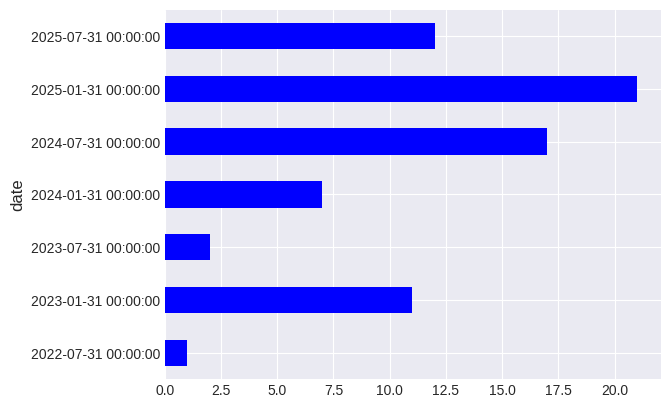

In [73]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [74]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [75]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-76-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-76-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-76-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-76-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-76-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

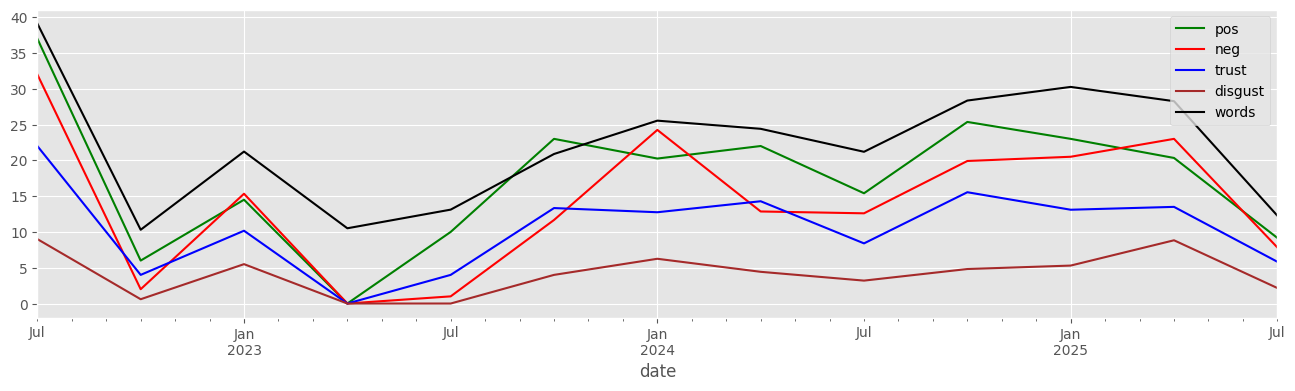

In [76]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [77]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-78-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

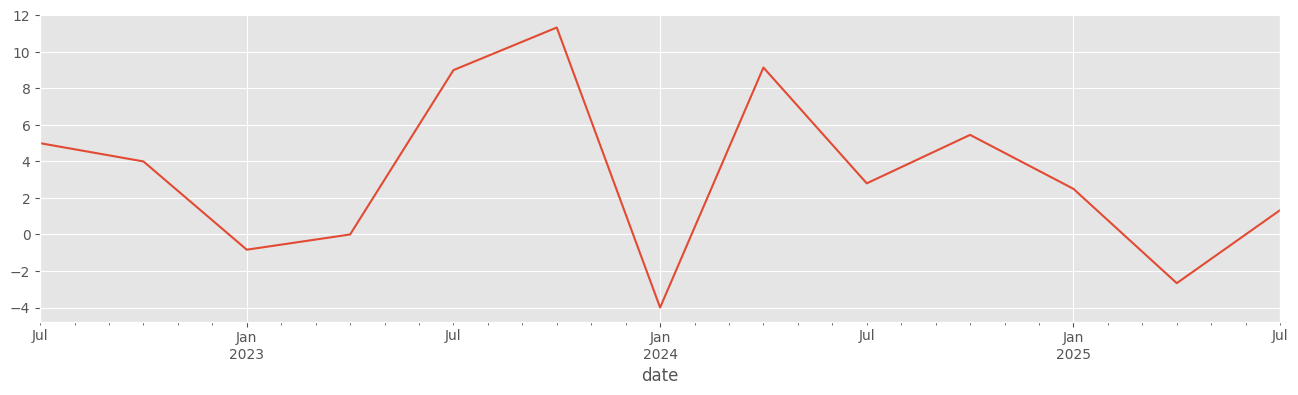

In [78]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [79]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-80-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-80-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

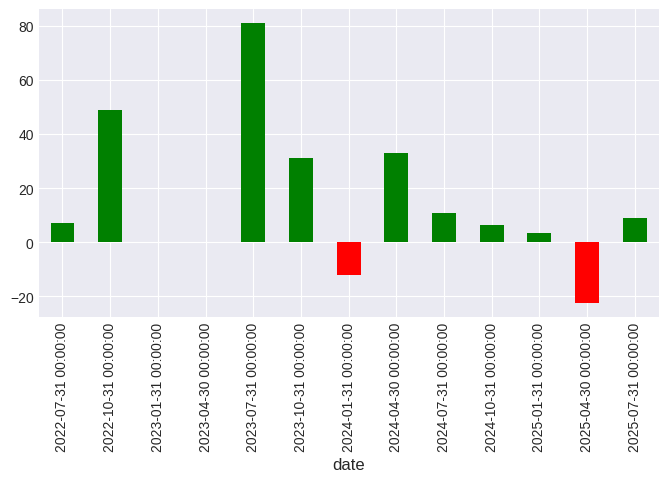

In [80]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-81-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

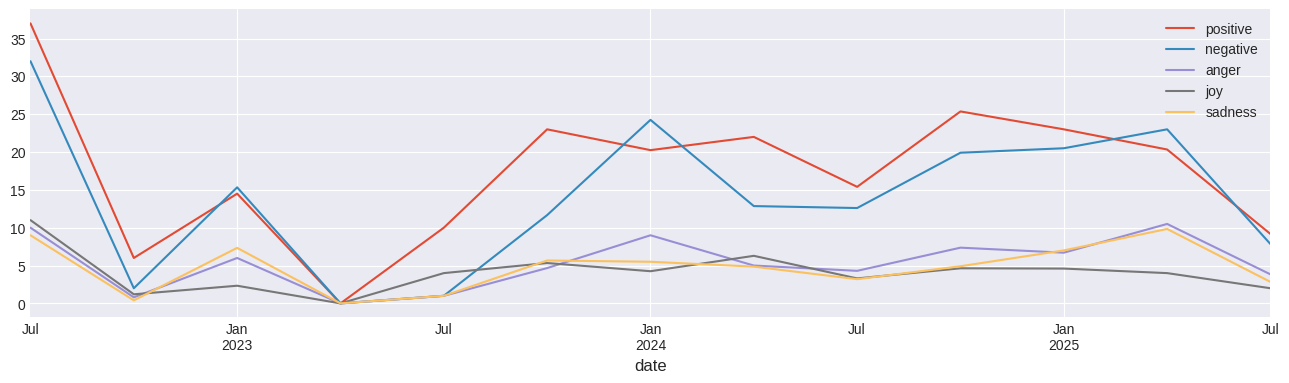

In [81]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [82]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2025-01-08        24         2                             85.0
2024-12-30         2        12                            -71.0

In [83]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

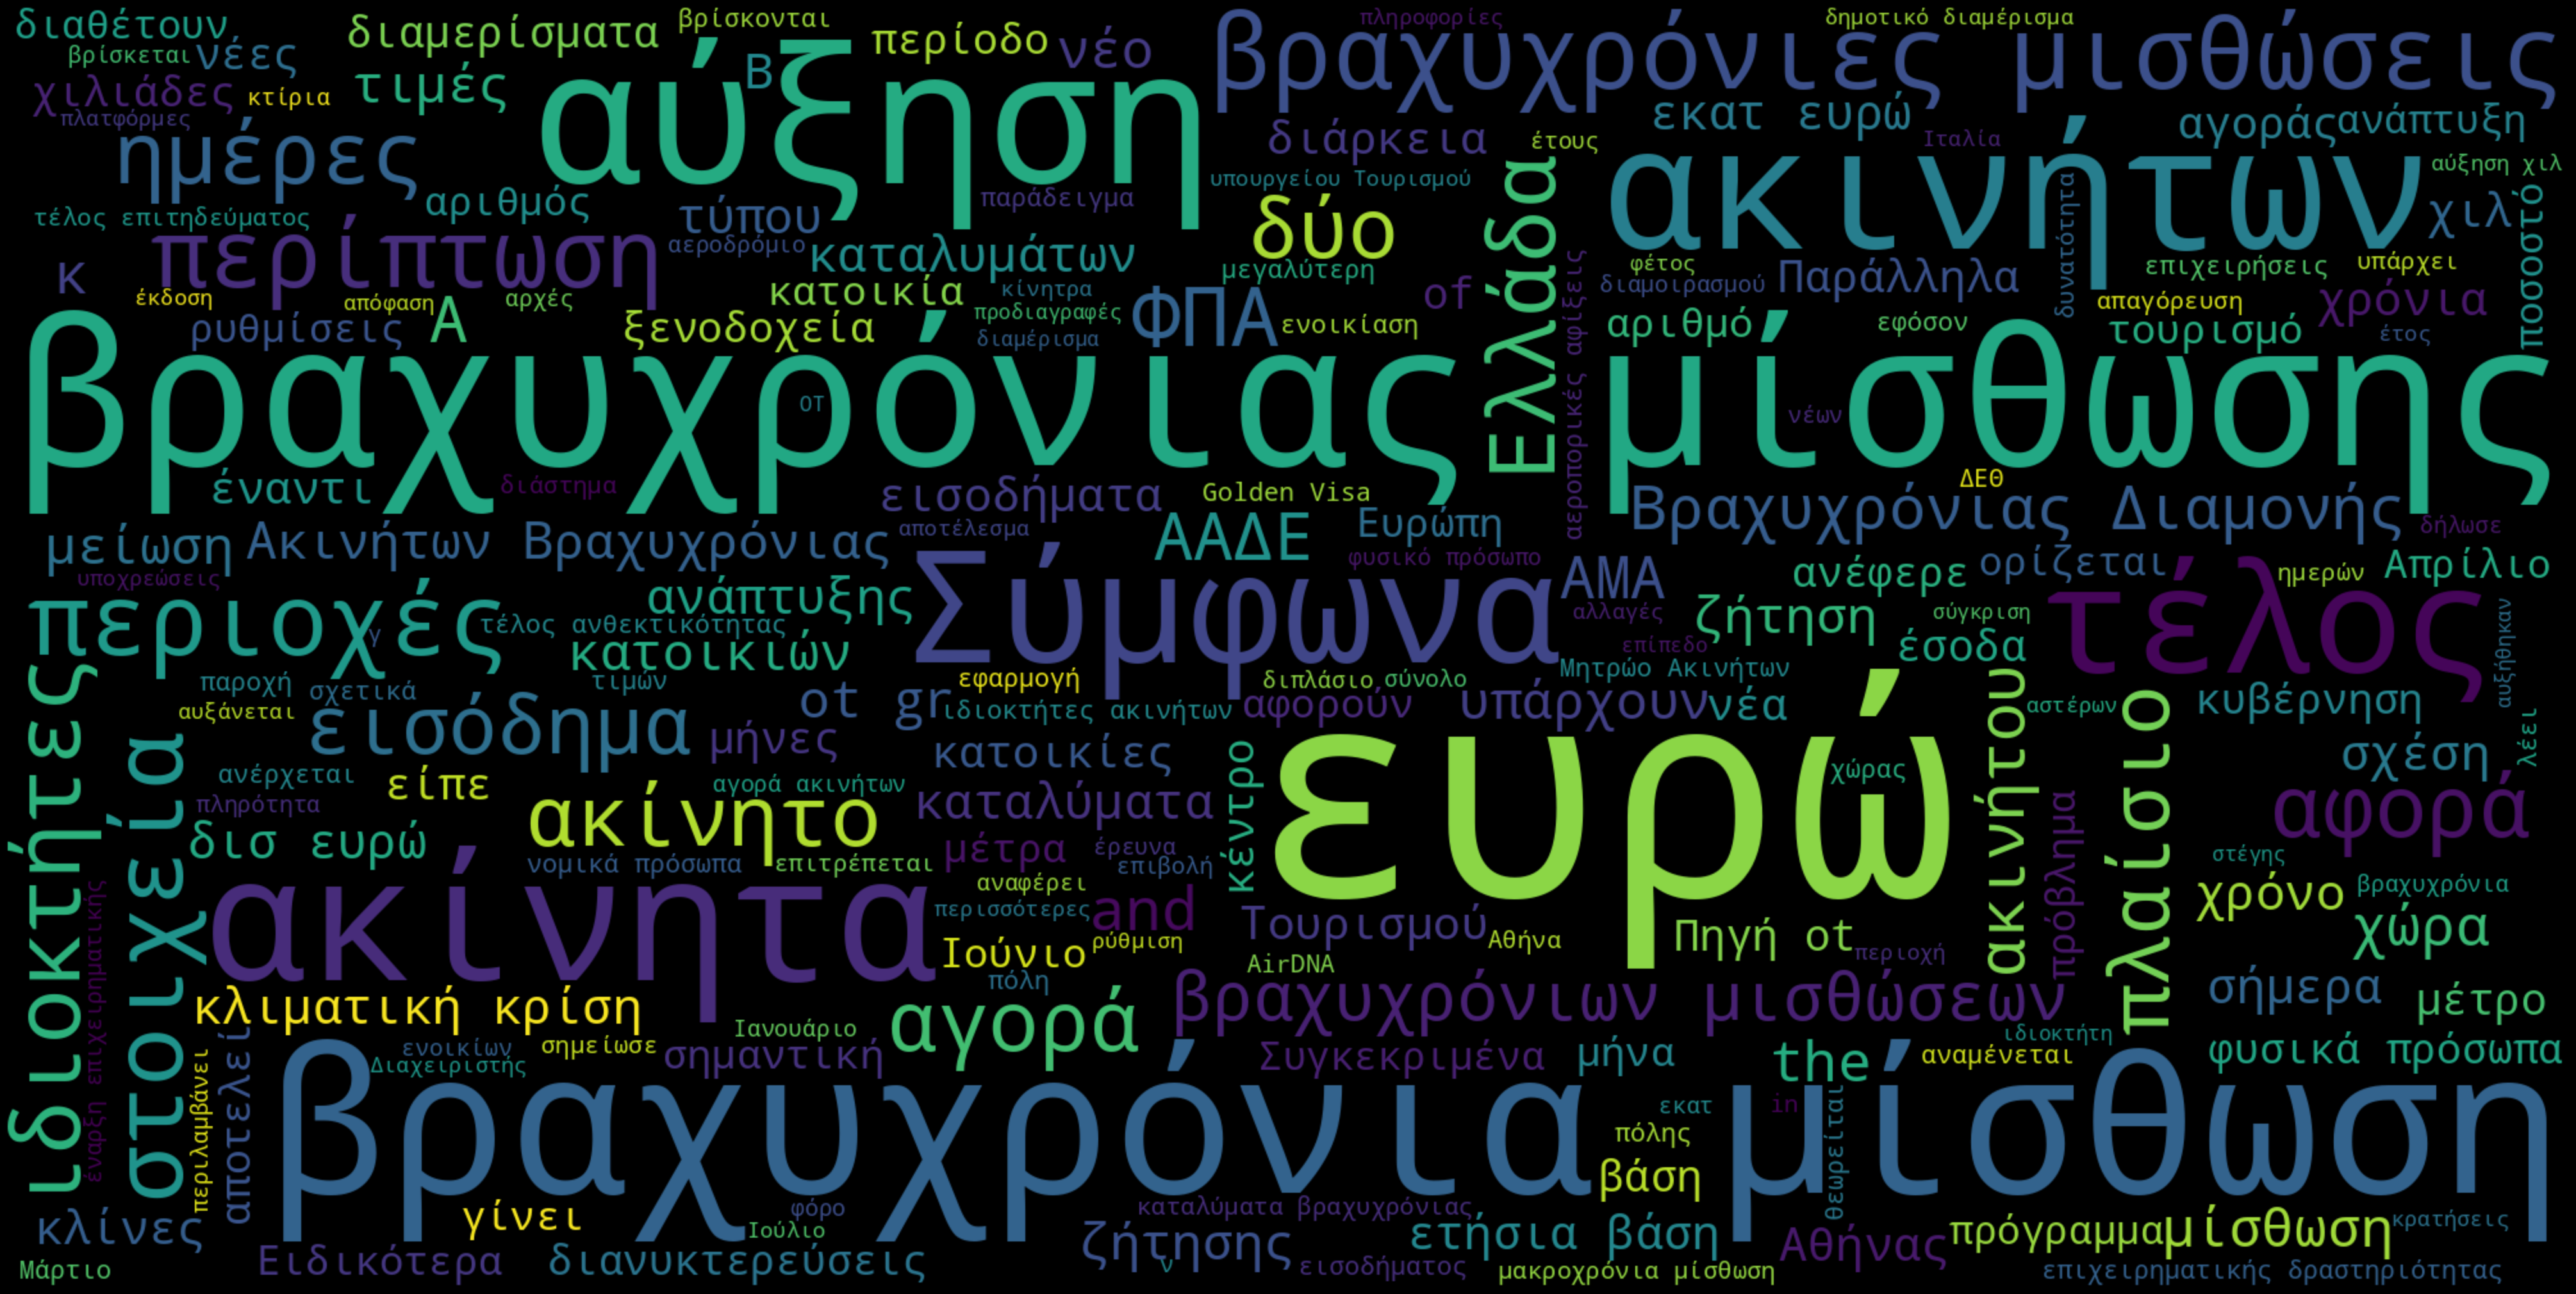

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'airbnb', 'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [85]:
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2025-04-12  Καθώς οι ευρωπαϊκές πόλεις αγωνίζονται να αντι...     37   
2024-09-18  Περιορισμένο αντίκτυπο στην στεγαστική κρίση π...      4   
2024-09-08  Φοροκίνητρα σε ιδιοκτήτες ακινήτων αξίας έως 5...      6   
2024-06-21  Η Βαρκελώνη σχεδιάζει να απαγορεύσει όλες τις ...      4   
2024-06-01  Νέες παρεμβάσεις για τα Airbnb εξετάζει η κυβέ...      8   
2024-05-26  Νέες παρεμβάσεις για τα Airbnb εξετάζει η κυβέ...      6   
2024-01-02  Η πόλη της «Αφροδίτης» του Μποτιτσέλι και του ...     11   
2023-11-15  Αλλαγές στο πλαίσιο λειτουργίας του καθεστώτος...      4   
2023-10-25  Υπέρ μίας ήπιας λύσης, που θα ρυθμίζει το καθε...      7   
2022-12-22  Η εταιρεία παροχής υπηρεσιών βραχυπρόθεσμης δι...     11   
2022-11-15  Από τρεις μέχρι και οκτώ φορές υψηλότερα είναι...      7   

            positive  joy  disgust  surprise  trust  anticipati

In [86]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2025-04-12  Καθώς οι ευρωπαϊκές πόλεις αγωνίζονται να αντι...     37   
2024-09-18  Περιορισμένο αντίκτυπο στην στεγαστική κρίση π...      4   
2024-09-08  Φοροκίνητρα σε ιδιοκτήτες ακινήτων αξίας έως 5...      6   
2024-06-21  Η Βαρκελώνη σχεδιάζει να απαγορεύσει όλες τις ...      4   
2024-06-01  Νέες παρεμβάσεις για τα Airbnb εξετάζει η κυβέ...      8   
2024-05-26  Νέες παρεμβάσεις για τα Airbnb εξετάζει η κυβέ...      6   
2024-01-02  Η πόλη της «Αφροδίτης» του Μποτιτσέλι και του ...     11   
2023-11-15  Αλλαγές στο πλαίσιο λειτουργίας του καθεστώτος...      4   
2023-10-25  Υπέρ μίας ήπιας λύσης, που θα ρυθμίζει το καθε...      7   
2022-12-22  Η εταιρεία παροχής υπηρεσιών βραχυπρόθεσμης δι...     11   
2022-11-15  Από τρεις μέχρι και οκτώ φορές υψηλότερα είναι...      7   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-04-12        80   14       36        10     48            33       36   
2024-09-18        29    5        1         3     10             3        6   
2024-09-08        14    2        2         1      3             3        2   
2024-06-21         7    1        3         1      2             2        2   
2024-06-01        23    4        3         2     13             8        5   
2024-05-26        22    8        3         2     12            10        5   
2024-01-02        31    7       17         4     24            12        6   
2023-11-15        21    2        1         5      7             2        5   
2023-10-25        25    5        5         7     18             6        5   
2022-12-22        19    3       10         1     19             9       15   
2022-11-15         7    1        5         3      7             4        8   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2025-04-12        78    43        2                              1.0  
2024-09-18        16    10       13                             29.0  
2024-09-08        16     4       -2                             -7.0  
2024-06-21         5     2        2                             17.0  
2024-06-01        20     5        3                              7.0  
2024-05-26        16     5        6                             15.0  
2024-01-02        29    11        2                              3.0  
2023-11-15        16    12        5                             13.0  
2023-10-25         9     4       16                             47.0  
2022-12-22        34    10      -15                            -29.0  
2022-11-15        14     8       -7                            -33.0

In [87]:
len(filtered_df)

11

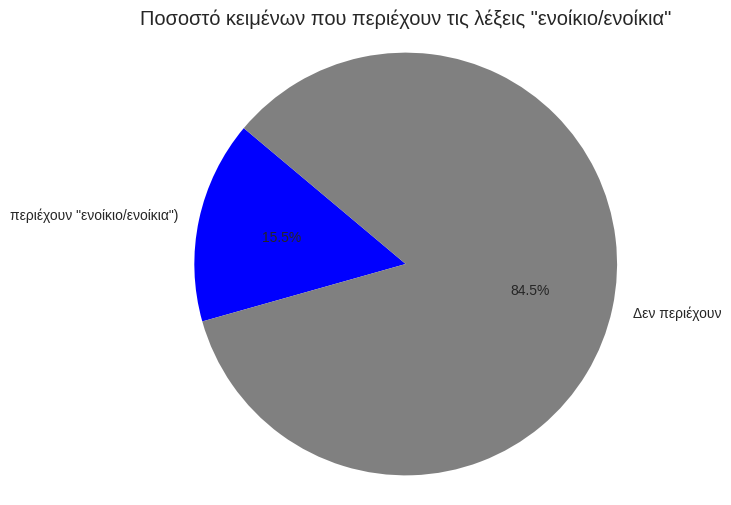

In [88]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "ενοίκιο/ενοίκια")', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "ενοίκιο/ενοίκια"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()